# ResNet modelidan foydalanish
>Pnevmoniya va sog'lom tasvirlarini ajratish uchun ResNet modelini foydalanishni ko’rib chiqamiz.

## Kaggle Dataset-ni yuklab olish

In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:47<00:00, 21.6MB/s]
100% 2.29G/2.29G [01:47<00:00, 22.9MB/s]


### Yuklab olingan faylni ochish

In [2]:
!unzip chest-xray-pneumonia.zip -d /content/chest_xray


Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  


## Ma'lumotlarni tayyorlash
>Tasvirlar to'plami tuzilishini tekshirib ko'rish

In [3]:
import os

# Correct path to the train, validation, and test directories
train_dir = '/content/chest_xray/chest_xray/train'
valid_dir = '/content/chest_xray/chest_xray/val'
test_dir = '/content/chest_xray/chest_xray/test'

# Verify if the directories exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(valid_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

# Print the contents of the directories if they exist
if os.path.exists(train_dir):
    print(f"Train directory contents: {os.listdir(train_dir)}")
if os.path.exists(valid_dir):
    print(f"Validation directory contents: {os.listdir(valid_dir)}")
if os.path.exists(test_dir):
    print(f"Test directory contents: {os.listdir(test_dir)}")



Train directory exists: True
Validation directory exists: True
Test directory exists: True
Train directory contents: ['NORMAL', 'PNEUMONIA']
Validation directory contents: ['NORMAL', 'PNEUMONIA']
Test directory contents: ['NORMAL', 'PNEUMONIA']


###  Ma'lumotlarni tayyorlash va ResNet50 modelini yaratish

In [4]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# ResNet50 modelini oldindan o'qitilgan vaznlar bilan yuklaymiz
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Boshqa qatlamlarni o'qitishga ruxsat berish
for layer in base_model.layers:
    layer.trainable = True


# Yangi qatlamlarni qo'shish
x = base_model.output
x = GlobalAveragePooling2D()(x)      # Xususiyatlarni yig'ish
x = Dense(1024, activation='relu')(x)  # Fully connected qatlam
x = Dense(1, activation='sigmoid')(x)  # Binary tasniflash

# To'liq modelni yaratish
model = Model(inputs=base_model.input, outputs=x)

# Modelni kompilyatsiya qilish
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## Modelni yaratish va o'qitish
>ResNet50 modelini yaratib, o'qitishni davom ettiramiz:

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Train, validation va test ma'lumotlari papkalarining to'g'ri yo'llarini belgilaymiz
train_dir = '/content/chest_xray/chest_xray/train'
valid_dir = '/content/chest_xray/chest_xray/val'
test_dir = '/content/chest_xray/chest_xray/test'

# Papkalar mavjudligini tekshirish
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(valid_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

# Agar papkalar mavjud bo'lsa, tarkibini chiqarish
if os.path.exists(train_dir):
    print(f"Train directory contents: {os.listdir(train_dir)}")
if os.path.exists(valid_dir):
    print(f"Validation directory contents: {os.listdir(valid_dir)}")
if os.path.exists(test_dir):
    print(f"Test directory contents: {os.listdir(test_dir)}")

# Train uchun ma'lumotlar generatorini yaratish (Data Augmentation qo'llaniladi)
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Tasvirlarni normalizatsiya qilish
    rotation_range=20,         # Tasvirlarni tasodifiy aylantirish
    width_shift_range=0.2,     # Tasvirlarni gorizontal ravishda siljitish
    height_shift_range=0.2,    # Tasvirlarni vertikal ravishda siljitish
    shear_range=0.2,           # Shear
    zoom_range=0.2,            # Tasvirlarni tasodifiy kattalashtirish
    horizontal_flip=True,      # Tasvirlarni gorizontal ravishda teskari qilish
    fill_mode='nearest'        # Yangi piksellarni to'ldirish
)

# Validation uchun faqat normalizatsiya (data augmentation qo'llanilmaydi)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Train va validation uchun generatorlarni yaratish
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tasvir o'lchamini 224x224 ga o'zgartirish
    batch_size=32,           # Batch o'lchami
    class_mode='binary'      # Ikki klassli tasniflash
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),  # Tasvir o'lchamini 224x224 ga o'zgartirish
    batch_size=32,           # Batch o'lchami
    class_mode='binary'      # Ikki klassli tasniflash
)

# ResNet50 modelini oldindan o'qitilgan vaznlar bilan yuklash (top qatlamlarsiz)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modelning birinchi 143 qatlamini muzlatib qo'yish (faqat so'nggi qatlamlarni qayta o'qitish)
for layer in base_model.layers[:143]:
    layer.trainable = False

# ResNet50 ga yangi qatlamlar qo'shish
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Xususiyatlarni yig'ish
x = Dense(1024, activation='relu')(x)  # Fully connected qatlam
x = Dropout(0.5)(x)  # Dropout qatlamini qo'shish (ortiqcha o'rganishni oldini olish)
x = BatchNormalization()(x)  # Batch Normalization qatlamini qo'shish
x = Dense(1, activation='sigmoid')(x)  # Ikki klassli tasniflash uchun chiqish qatlam

# Modelni yakuniy shaklga keltirish
model = Model(inputs=base_model.input, outputs=x)

# Modelni kompilyatsiya qilish
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# O'qitishni optimallashtirish uchun o'rganish tezligini kamaytirish
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# steps_per_epoch va validation_steps ni hisoblash
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

# Modelni o'qitish
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=28,  # Epochlar soni
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[lr_scheduler]  # Learning rate scheduler ni qo'shish
)

# Test ma'lumotlari yordamida modelni baholash
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Ikki klassli tasniflash
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# Test ma'lumotlari bo'yicha prognozlar qilish va natijalarni chiqarish
img_files = os.listdir(test_dir)
predictions = model.predict(test_generator)

for i, prediction in enumerate(predictions):
    print(f"Image {img_files[i]} Prediction: {prediction[0]}")
    if prediction[0] > 0.5:
        print("Class: 1 (Pneumonia)")
    else:
        print("Class: 0 (No Pneumonia)")



## Modelni baholash

In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test ma'lumotlar uchun ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# Test generatorini yaratish
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary tasniflash
)

# Modelni test set orqali baholash
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Natijalarni chiqarish
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")




Found 624 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.8529 - loss: 0.3281
Test loss: 0.34267958998680115
Test accuracy: 0.8453947305679321


## Modelni saqlash

In [ ]:

# Modelni saqlash
model.save('/content/chest_xray_model.h5')
print("Model saqlandi.")

from google.colab import drive
drive.mount('/content/drive')

# Modelni Google Drive-ga ko'chirish
model.save('/content/drive/My Drive/chest_xray_model.h5')
print("Model Google Drive-ga saqlandi.")


NameError: name 'model' is not defined

## Grafik

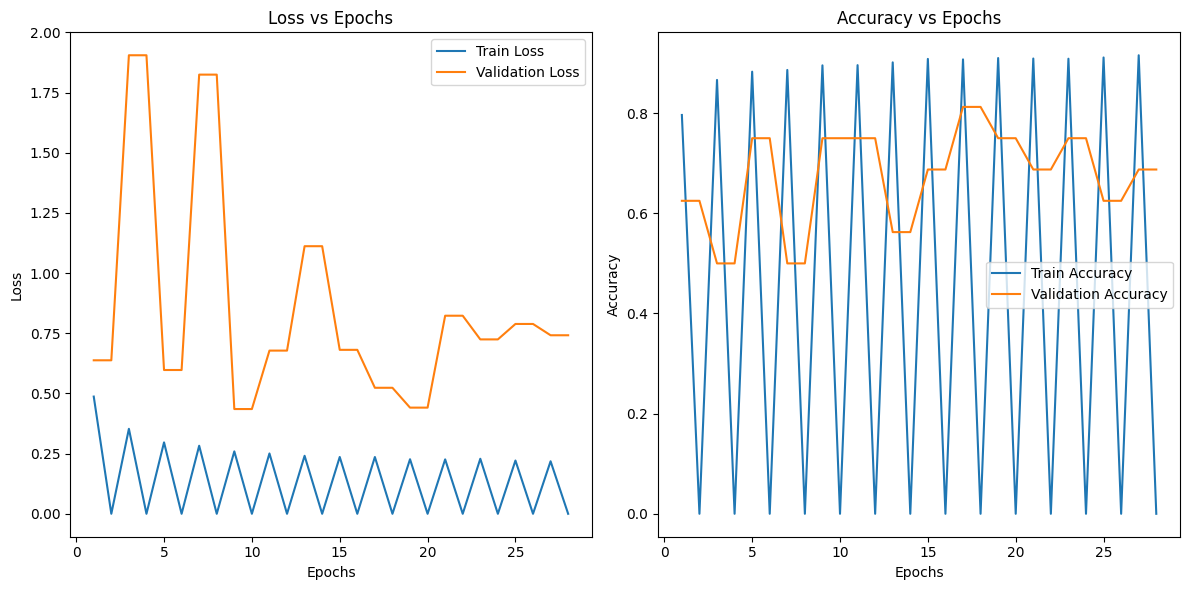

In [11]:
import matplotlib.pyplot as plt

# O'qitish tarixidagi loss va accuracy ni olish
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss grafikasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafikasi
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafiklarni ko'rsatish
plt.tight_layout()
plt.show()
